In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt

from utils_cdpp_meta_data import cdpp_stats
from utils_data_prep import prep_data
from utils_fixed_lightkurve_functions import estimate_cdpp

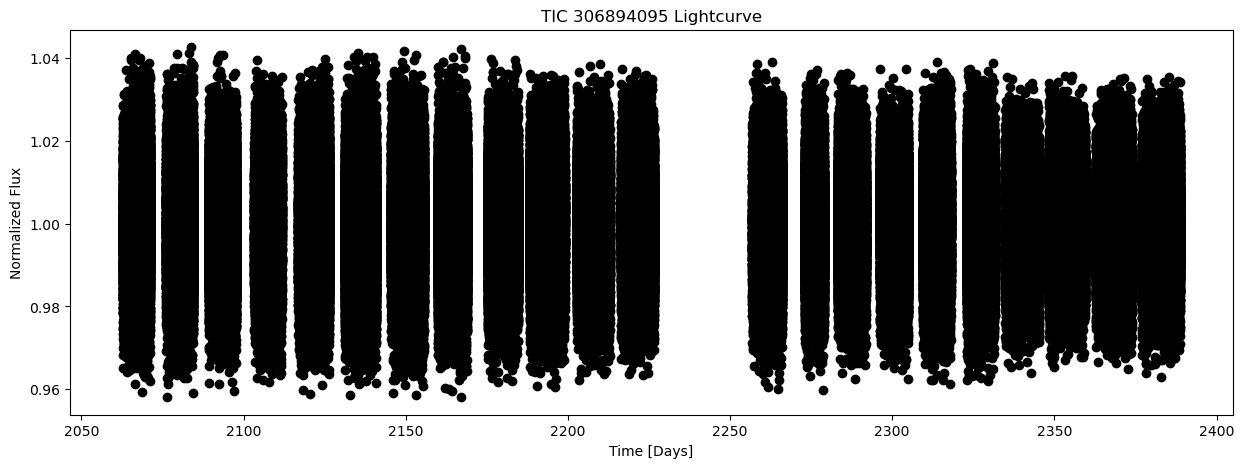

In [2]:
# prep light curves using the prep_data function

target = 306894095 # only use number from ticid, can be int or string
sectors = np.arange(27,40,1) # make a list of the sectors you want to include
sectors = True # use True to pull all available sectors (I did this for all my estimations)
crop = 1 # number of days to crop around sector discontinuities

# prep data
lc = prep_data(target, sectors, crop)

# plot stitched lightcurve
plt.figure(figsize=(15, 5))
plt.plot(lc.time.value, lc.flux.value, 'o', color='k')
plt.title(f'TIC {target} Lightcurve')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [Days]')
plt.show()

In [3]:
# estimate 30 minute cdpp using the fixed lightkurve functions

transit_time = 30 # minutes
transit_time_cadences = int( 30 * 60 / 20 ) # transit time in number of 20s cadences


estimated_cdpp = estimate_cdpp(lc, 
                     transit_duration=transit_time_cadences, 
                     savgol_window=8997 # width of filter in cadences (2 days)
                    )

print(estimated_cdpp)

1067.0538845296294


In [4]:
# pull cdpp from header using my scripts
# times in fits header are: 'CDPP0_5', 'CDPP1_0', 'CDPP2_0'
mean_30, med_30, std_30 = cdpp_stats( str(target), 'CDPP0_5' ) # inputs need to be strings

# stats are from all available sectors in our data
print(mean_30)
print(med_30)

1249.2353848545454
1246.5135498
